In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

import time

In [39]:
cars_df = pd.read_csv("data/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
cars_df.replace(cleanup_nums,inplace = True)

In [41]:
target = cars_df['class']

In [42]:
cars_df.drop( ['class'],axis = 1,inplace = True)

In [43]:
cars_df_categorical = pd.get_dummies(cars_df)
cars_df_categorical.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(cars_df_categorical, target, random_state = 42)

In [45]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

1296
1296
432
432


In [46]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(random_state=42)

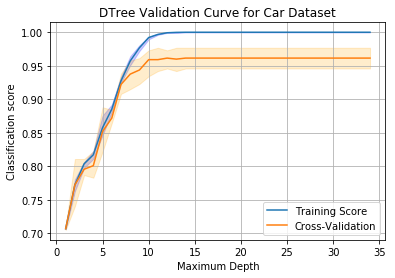

In [47]:
train_scores, test_scores = validation_curve(dt_model, X_train, Y_train, param_name="max_depth", param_range=np.arange(1,35), cv=5,
                                            n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(np.arange(1,35), avg_train_score, label='Training Score')
plt.plot(np.arange(1,35), avg_test_score, label='Cross-Validation')

plt.fill_between(np.arange(1,35), np.min(train_scores,axis=1), np.max(train_scores,axis=1),facecolor="blue", color='blue', alpha=0.2)
plt.fill_between(np.arange(1,35), np.min(test_scores,axis=1), np.max(test_scores,axis=1),facecolor="orange", color='orange', alpha=0.2)
plt.title('DTree Validation Curve for Car Dataset')
plt.xlabel('Maximum Depth')
plt.ylabel("Classification score")
plt.legend()
plt.grid()
plt.show()

In [48]:
best_decision_tree = GridSearchCV(dt_model, param_grid={'max_depth' : np.arange(1,35)}, cv=5, n_jobs=4)
train_t0 = time.time()
best_decision_tree.fit(X_train, Y_train)
train_t1 = time.time()
t0 = time.time()
prediction = best_decision_tree.predict(X_test)
t1 = time.time()

print('Train Time: ', train_t1 - train_t0)
print('Test Time: ', t1 - t0)
print('Top Accuracy:', (accuracy_score(Y_test, prediction) * 100))
print('Top params: ', best_decision_tree.best_params_)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction))

Train Time:  0.23814177513122559
Test Time:  0.0005166530609130859
Top Accuracy: 96.99074074074075
Top params:  {'max_depth': 12}
[[ 17   2   1   0]
 [  1  14   0   0]
 [  3   4  95   1]
 [  0   0   1 293]]


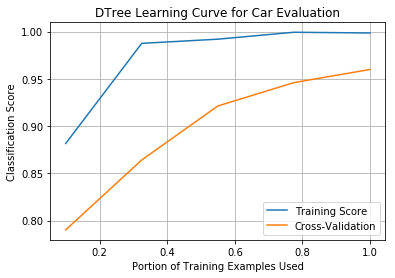

In [51]:
train_sizes, train_scores, test_scores = learning_curve(best_decision_tree, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, n_jobs=4)
avg_train_score, avg_test_score = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure()
plt.plot(train_sizes/train_sizes[-1], avg_train_score, label='Training Score')
plt.plot(train_sizes/train_sizes[-1], avg_test_score, label='Cross-Validation')
plt.title('DTree Learning Curve for Car Evaluation')
plt.xlabel('Portion of Training Examples Used')
plt.ylabel("Classification Score")
plt.legend()
plt.grid()
plt.show()